# Menon Labs: Spotify Initial Data Analysis - KNN Model Training

### **Collaborators** 
- Ashna Sood 
- Shubhum Agrawal
- Shania Sinha
- Sergio Vazquez
- Rohil Khatkhate
- Kerrn Reehal

In [1]:
# import statements
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import pickle

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.metrics import make_scorer, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

In [7]:
# read in labeled songs CSV file
labeled_songs = pd.read_csv('final_labels.csv', index_col='id')
labeled_songs

,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,loudness,tempo,cluster,emotion
id,,,,,,,,,,,,,
35mvY5S1H3J2QZyna3TFe0,positions,['Ariana Grande'],0.468000,0.737,0.802,0.000000,0.0931,0.0878,0.682,-4.771,144.015,0,Energetic
6Hj9jySrnFppAI0sEMCZpJ,Robbery,['Juice WRLD'],0.328000,0.685,0.692,0.000000,0.1530,0.0457,0.578,-5.122,159.966,0,Energetic
2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,['Travis Scott'],0.005130,0.834,0.730,0.000000,0.1240,0.2220,0.446,-3.714,155.008,0,Energetic
27X3qzgB0Show6qfw5wNOK,Esquema Preferido,"['DJ Ivis', 'Tarcísio do Acordeon']",0.256000,0.669,0.812,0.000000,0.0773,0.1100,0.917,-4.597,159.934,0,Energetic
2Y0wPrPQBrGhoLn14xRYCG,Come & Go (with Marshmello),"['Juice WRLD', 'Marshmello']",0.017200,0.625,0.814,0.000000,0.1580,0.0657,0.535,-5.181,144.991,0,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4qZq5qn0CSA6YF96OM5XVZ,Manifest- Manifest (2004),['Abuse'],0.000001,0.141,0.931,0.224000,0.3120,0.2010,0.613,-7.091,212.980,29,Powerful
6T0aBJyFi7U3zHuaYSMWIP,Bach Jao Mundeyo,['Sardool Sikander'],0.533000,0.658,0.852,0.000002,0.0582,0.3560,0.801,-7.159,183.985,29,Powerful
2n8nDfBot4MddUcUKoAqGz,Horseface,['Yea(H)'],0.004480,0.306,0.982,0.243000,0.1800,0.0416,0.558,-5.640,188.499,29,Powerful


In [8]:
# define X and y
X = labeled_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                            'speechiness', 'valence', 'loudness', 'tempo']]
y = labeled_songs.iloc[:, -1:]

In [9]:
# split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# train model with various k neighbors to determine the optimal k value 
neighbors = [3, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53]

knn_predicteds=[]
for k in neighbors:
    # create and train the KNN model 
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    # calculate the training accuracy
    knn_train_acc = knn_model.score(X_train, y_train)
    print("Training Set accuracy for k =", k, " ", knn_train_acc)

    # make predictions and calculate the testing accuracy
    knn_pred = knn_model.predict(X_test)
    knn_true = y_test
    knn_test_acc = accuracy_score(knn_true, knn_pred)
    print("Test Set accuracy for k =", k, " ", knn_test_acc)
    # add testing accuracy to eventually plot the accuracies for each k value 
    knn_predicteds.append(knn_test_acc)

Training Set accuracy for k = 3   0.9728649144654913
Test Set accuracy for k = 3   0.9394756554307117
Training Set accuracy for k = 5   0.9674310308773179
Test Set accuracy for k = 5   0.9442696629213483
Training Set accuracy for k = 9   0.962249958645056
Test Set accuracy for k = 9   0.9469288389513109
Training Set accuracy for k = 13   0.9591444364335496
Test Set accuracy for k = 13   0.9472534332084894
Training Set accuracy for k = 17   0.9564446608426421
Test Set accuracy for k = 17   0.9471660424469414
Training Set accuracy for k = 21   0.9544658657852602
Test Set accuracy for k = 21   0.9472534332084894
Training Set accuracy for k = 25   0.9525900679469533
Test Set accuracy for k = 25   0.946079900124844
Training Set accuracy for k = 29   0.950864084245483
Test Set accuracy for k = 29   0.9448689138576779
Training Set accuracy for k = 33   0.9491599484389679
Test Set accuracy for k = 33   0.9437578027465668
Training Set accuracy for k = 37   0.9476212324085431
Test Set accuracy f

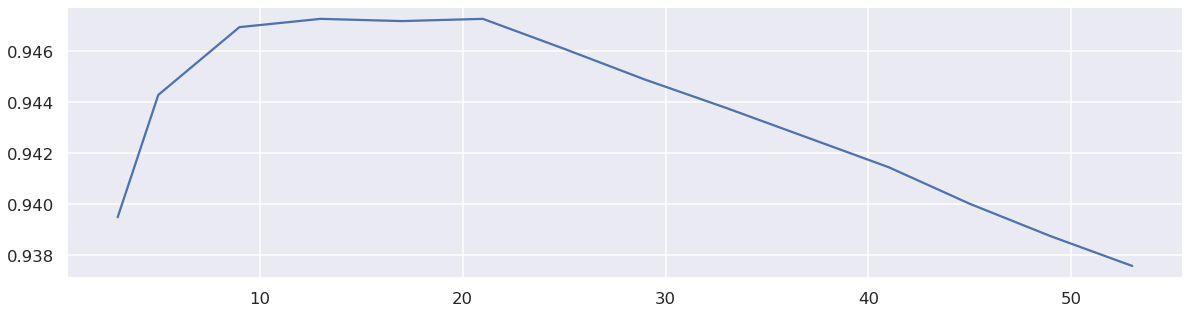

In [15]:
# plot the test accuracies for each k value model to evaluate which model performs best 
plt.figure(figsize=(20,5))
plt.plot(neighbors, knn_predicteds)
plt.show()

In [16]:
# create and train the KNN model with 13 neighbors -- highest testing accuracy 
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [17]:
# calculate the training accuracy
knn_train_acc = knn_model.score(X_train, y_train)
print("Training Set accuracy for k = 5:", knn_train_acc)

# make predictions and calculate the testing accuracy
knn_pred = knn_model.predict(X_test)
knn_true = y_test
knn_test_acc = accuracy_score(knn_true, knn_pred)
print("Test Set accuracy for k = 5:", knn_test_acc)

Training Set accuracy for k = 5: 0.9591444364335496
Test Set accuracy for k = 5: 0.9472534332084894


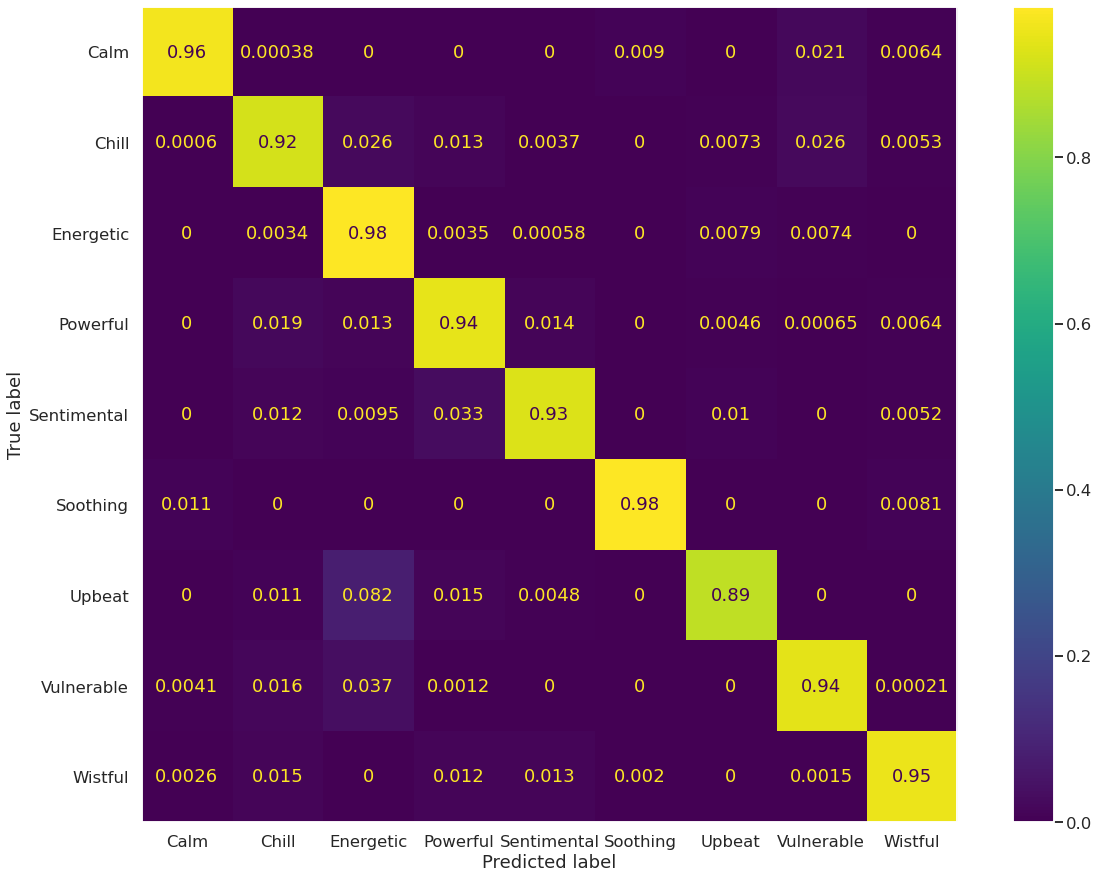

In [18]:
# caclulate confusion matrix to visualize TP, FP, TN, FN rates 
fig, ax = plt.subplots(figsize=(20, 15))
plot_confusion_matrix(knn_model,X_test,y_test,normalize='true', ax=ax)
plt.grid(False)

In [19]:
# save X_test predicted emotion labels and compare with actual label
results = pd.DataFrame(knn_true)
results["Predicted"] = knn_pred
results.columns = ["Actual", "Predicted"]
results

,Actual,Predicted
id,,
6GReyBdK4PLgl1jbNS3nQa,Powerful,Powerful
4nwVYXY6mq7fPyepg3j5la,Upbeat,Upbeat
54ycMI3vGhVoemfiuNL9qe,Energetic,Energetic
0wJtWRtWUWJpsWTwpr1H9Z,Energetic,Energetic
55Oe1pIzC6Tnn3yeQLT9Lk,Vulnerable,Vulnerable
...,...,...
4B6cJ34Mkfiu4Xo8t8QU7F,Chill,Chill
1ftmjB2nlK2kCOCxZXDWNi,Energetic,Energetic
2A9al7N5HbYttXGgPEgH2G,Powerful,Powerful


In [20]:
# incorrectly identified songs 
incorrect_results = results.loc[results["Actual"] != results["Predicted"]]   
incorrect_results

,Actual,Predicted
id,,
7ru0anr4H7X3qNThbdnYaN,Calm,Vulnerable
2Mtmth523LEPd59UtZiz9M,Powerful,Upbeat
2n5jcc5NnIxEGTpm49iNQw,Chill,Energetic
18gvv9SBJMybZ0sGQyATXJ,Chill,Energetic
2WQFY0QkKraz04CO12OG4S,Chill,Sentimental
...,...,...
4myLolRZ6C6MhYMGqEXpMo,Vulnerable,Chill
4nXKeAccNYFFPPDxPL89ZY,Energetic,Upbeat
4ULYtmBQl8fhbAonNV5wWT,Vulnerable,Energetic


In [21]:
# audio features for the incorrectly identified songs 
incorrect_vals = pd.merge(labeled_songs, incorrect_results, on='id', how='left')
incorrect_vals.dropna(inplace=True)
incorrect_vals

,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,loudness,tempo,cluster,emotion,Actual,Predicted
id,,,,,,,,,,,,,,,
6fx1fKIs5e0pBL5FpdC7RB,MakeDamnSure,['Taking Back Sunday'],0.009410,0.553,0.837,0.000000,0.3720,0.0452,0.432,-5.608,140.495,0,Energetic,Energetic,Upbeat
1zedfw5iu7XzKJT8CupEIP,Simon Says,['NCT 127'],0.218000,0.653,0.836,0.000000,0.0507,0.2380,0.569,-6.018,151.977,0,Energetic,Energetic,Upbeat
1JvUmKSl9Mg6mQnmbjLYyz,Suspus,['Ceza'],0.008580,0.824,0.708,0.000000,0.1500,0.2010,0.522,-5.836,157.967,0,Energetic,Energetic,Upbeat
7iOSeHfKU2EhSKcX7TbjKG,Blind and Frozen,['Beast In Black'],0.000032,0.491,0.950,0.000017,0.0698,0.0590,0.497,-6.719,146.007,0,Energetic,Energetic,Upbeat
6qjcR3YhnmZ8qT7BGOXLR6,Take It Outside,['Brantley Gilbert'],0.000112,0.427,0.743,0.027500,0.1480,0.0343,0.486,-5.908,156.784,0,Energetic,Energetic,Upbeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4OSic27eMpPKPbBj0H2swF,Gire opp og gær`n,['Vazelina Bilopphøggers'],0.394000,0.517,0.805,0.000001,0.2380,0.0477,0.963,-5.927,185.124,29,Powerful,Powerful,Energetic
7xkOgJuT5xa2iOzG92uatD,Западло,['Grazhdanskaya Oborona'],0.000415,0.196,0.467,0.812000,0.0626,0.0430,0.701,-12.847,208.557,29,Powerful,Powerful,Wistful
79q9HoErID1teqgMH6gRaL,Şu Milletin Halk Sancağı,['Grup Kızılırmak'],0.684000,0.493,0.467,0.000421,0.2100,0.0517,0.714,-12.114,208.276,29,Powerful,Powerful,Wistful


In [29]:
# calculate F1 Score as a further metric to evaluate model performance
from sklearn.metrics import f1_score
f1_score(knn_true, knn_pred, average='weighted')

0.947076302696433

Overall, the K-Nearest Neighbors model performed the best and had the highest testing accuracy of 94.7%, indicating a strong model performance and accuracy in predicting the emotion label of a song. Thus, the KNN model was used as the final model to predict the associated emotional label of new songs.

In [23]:
# save the model to be imported and converted to Javascript later
# Save to file in the current working directory
pkl_filename = "final_KNN_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_model, file)